In [1]:
import random
import pandas as pd

In [2]:
# Fitness function - calculates the fitness of a given chromosome
def fitness(chromosome, budget):
    total_cost = sum(chromosome.values())
    return (budget - total_cost) / budget

In [3]:
# Selection function - selects two chromosomes from the population based on their fitness
def selection(population, budget):
    fitness_values = [fitness(chromosome, budget) for chromosome in population] 
    sum_fitness = sum(fitness_values)
    selection_probabilities = [fitness_value/sum_fitness for fitness_value in fitness_values]
    index1 = random.choices(range(len(population)), weights=selection_probabilities)[0]
    index2 = random.choices(range(len(population)), weights=selection_probabilities)[0]
    return population[index1], population[index2]

In [16]:
# Crossover function - performs a single-point crossover on two chromosomes
def crossover(chromosome1, chromosome2):
    crossover_point = random.randint(0, len(chromosome1)-1) 
    print(f"crossover:{crossover_point}")
    new_chromosome1 = { key: (chromosome1[key] if index <= crossover_point
                              else chromosome2[key]) for index, key in enumerate(chromosome1)} 
    new_chromosome2 = { key: (chromosome2[key] if index <= crossover_point 
                              else chromosome1[key]) for index, key in enumerate(chromosome2)} 
    return new_chromosome1, new_chromosome2

In [5]:
# Mutation function - mutates a single gene in the chromosome
def mutation(chromosome, mutation_rate):
    for key in chromosome:
        if random.random() < mutation_rate:
            chromosome[key] += random.randint(-10, 10)
    return chromosome

In [17]:
# Main function - runs the genetic algorithm
def genetic_algorithm(budget, population_size, generations, mutation_rate):
    # Generate initial population
    population = [{ 'Shopping': random.randint(0, 100), 'Food & Drink': random.randint(200, 300),
               'Life & Entertainment': random.randint(10, 150),'Vehicle': random.randint(150, 250), 
               'Housing': random.randint(200, 300),'Education':random.randint(0,150)} for i in range(population_size)]
    best_chromosome = None
    for i in range(generations):
        # Select two parents from the population
        parent1, parent2 = selection(population, budget)
        # Create two children from the parents
        child1, child2 = crossover(parent1, parent2)
        # Mutate the children
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        # Add the children to the population
        population.extend([child1, child2])
        # Keep only the best chromosomes in the population
        population = sorted(population, key=lambda x: fitness(x, budget), reverse=True)[:population_size]
        # Update the best chromosome if necessary
        if best_chromosome is None or fitness(best_chromosome, budget) < fitness(population[0], budget):
            best_chromosome = population[0]
        # Print the best chromosome and its fitness
        print(f"Generation {i}: Best chromosome = {best_chromosome}, Fitness = {fitness(best_chromosome, budget)}")
    return best_chromosome


In [30]:
# Initialization 
budget = 2000
population_size = 120
generations = 100
mutation_rate = random.random()
results = pd.DataFrame(columns=["Best_chromosome", "Fitness"])

print(f"mutation_rate  : {mutation_rate}")
# best_chromosome = genetic_algorithm(budget, population_size, generations, mutation_rate)
# print(f"Best chromosome: {best_chromosome}, Fitness: {fitness(best_chromosome, budget)}")

# # Generate initial population
population = [{ 'Shopping': random.randint(0, 100), 'Food & Drink': random.randint(200, 300),
               'Life & Entertainment': random.randint(10, 150),
               'Vehicle': random.randint(150, 250), 'Housing': random.randint(200, 300), 
               'Education':random.randint(0,150)} for i in range(population_size)]
best_chromosome = None
for i in range(generations):
     # Select two parents from the population
    parent1, parent2 = selection(population, budget)
    # Create two children from the parents
    child1, child2 = crossover(parent1, parent2)
    # Mutate the children
    child1 = mutation(child1, mutation_rate)
    child2 = mutation(child2, mutation_rate)
    # Add the children to the population
    population.extend([child1, child2])
    # Keep only the best chromosomes in the population
    population = sorted(population, key=lambda x: fitness(x, budget), reverse=True)[:population_size]
    # Update the best chromosome if necessary
    if best_chromosome is None or fitness(best_chromosome, budget) < fitness(population[0], budget):
        best_chromosome = population[0]
    # Print the best chromosome and its fitness
    results=results.append({"Best_chromosome":best_chromosome, "Fitness":fitness(best_chromosome, budget)},ignore_index=True )
    print(f"Generation {i}: Best chromosome = {best_chromosome}, Fitness = {fitness(best_chromosome, budget)}")

print(f"Best chromosome: {best_chromosome}, Fitness: {fitness(best_chromosome, budget)}")

mutation_rate  : 0.5446168722214062
crossover:3
Generation 0: Best chromosome = {'Shopping': 31, 'Food & Drink': 220, 'Life & Entertainment': 10, 'Vehicle': 195, 'Housing': 219, 'Education': 32}, Fitness = 0.6465
crossover:5
Generation 1: Best chromosome = {'Shopping': 31, 'Food & Drink': 220, 'Life & Entertainment': 10, 'Vehicle': 195, 'Housing': 219, 'Education': 32}, Fitness = 0.6465
crossover:4
Generation 2: Best chromosome = {'Shopping': 31, 'Food & Drink': 220, 'Life & Entertainment': 10, 'Vehicle': 195, 'Housing': 219, 'Education': 32}, Fitness = 0.6465
crossover:4
Generation 3: Best chromosome = {'Shopping': 31, 'Food & Drink': 220, 'Life & Entertainment': 10, 'Vehicle': 195, 'Housing': 219, 'Education': 32}, Fitness = 0.6465
crossover:0
Generation 4: Best chromosome = {'Shopping': 31, 'Food & Drink': 220, 'Life & Entertainment': 10, 'Vehicle': 195, 'Housing': 219, 'Education': 32}, Fitness = 0.6465
crossover:2
Generation 5: Best chromosome = {'Shopping': 31, 'Food & Drink': 22

C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_15336\309250013.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"Best_chromosome":best_chromosome, "Fitness":fitness(best_chromosome, budget)},ignore_index=True )
C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_15336\309250013.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"Best_chromosome":best_chromosome, "Fitness":fitness(best_chromosome, budget)},ignore_index=True )
C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_15336\309250013.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"Best_chromosome":best_chromosome, "Fitness":fitness(best_chromosome, budget)},ignore_index=True )
C

In [8]:
import matplotlib.pyplot as plt

# generations = list(range(0, 1000))
# # fitness_scores = [-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Replace with actual fitness scores

# plt.plot(generations, fitness_values)
# plt.xlabel("Generation")
# plt.ylabel("Fitness Score")
# plt.title("Fitness Score vs Generation")
# plt.savefig("images/generation_fitnessvalue.png",dpi=120) 
# plt.show()
# plt.close()

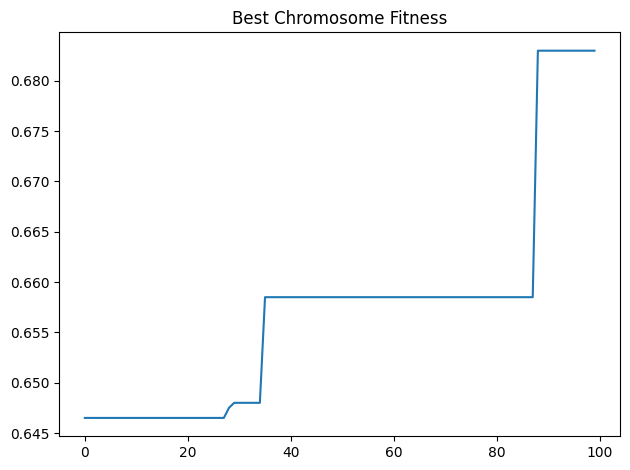

In [31]:
results.Fitness.plot(title="Best Chromosome Fitness")
plt.tight_layout()
plt.savefig("images/best_chromosome2.png",dpi=120) 
plt.show()

In [10]:
with open("metrics.txt", 'w') as outfile:
        outfile.write(f"Best chromosome: {best_chromosome}, Fitness: {fitness(best_chromosome, budget)}")

In [11]:
print(results)
print(f"Best chromosome: {best_chromosome}, Fitness: {fitness(best_chromosome, budget)}")

                                      Best_chromosome  Fitness
0   {'Shopping': 55, 'Food & Drink': 203, 'Life & ...    0.657
1   {'Shopping': 55, 'Food & Drink': 203, 'Life & ...    0.657
2   {'Shopping': 55, 'Food & Drink': 203, 'Life & ...    0.657
3   {'Shopping': 55, 'Food & Drink': 203, 'Life & ...    0.657
4   {'Shopping': 55, 'Food & Drink': 203, 'Life & ...    0.657
..                                                ...      ...
95  {'Shopping': 11, 'Food & Drink': 202, 'Life & ...    0.659
96  {'Shopping': 11, 'Food & Drink': 202, 'Life & ...    0.659
97  {'Shopping': 11, 'Food & Drink': 194, 'Life & ...    0.685
98  {'Shopping': 11, 'Food & Drink': 194, 'Life & ...    0.685
99  {'Shopping': 11, 'Food & Drink': 194, 'Life & ...    0.685

[100 rows x 2 columns]
Best chromosome: {'Shopping': 11, 'Food & Drink': 194, 'Life & Entertainment': 34, 'Vehicle': 154, 'Housing': 207, 'Education': 30}, Fitness: 0.685


In [12]:
print(best_chromosome['Food & Drink'])

194
